Adapted from the homeworks with the simple logistic model from the Deep Learning Toar Sheni class last year with Dr. Elishai Ezra Tzur. We will now add one hidden layer with 3 nodes and see how that changes things.

In [ ]:
#Dina Pinchuck 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

### sigmoid(z)

Here we define our activation function; the sigmoid function 

s = $g(\theta^{T}x)$

$z = \theta^{T}x$

$g(z) = \frac{1}{1+e^{(-z)}}$

X := data set

$\theta$ := vector of weights

Compute the sigmoid of z (A scalar or numpy array of any size) returns s

Verify: sigmoid([0, 2]) = [ 0.5, 0.88079708]

In [ ]:
def sigmoid(z): #sigmoid acitvation function
  X = np.exp(z)
  return X/(1+X)

In [ ]:
def relu(z): # relu acitvation function 
  return np.maximum(0,z) #returns np array - for each value in z if its negative it becomes zero else it stays the same
#tanh from numpy is used so there is no need to implment it 

Some examples of using this function. Notice that we can give it an array of values (not critical for us)

In [ ]:
print(sigmoid([0,2]))
print(sigmoid(2))
print(sigmoid(np.array([4])))


[0.5        0.88079708]
0.8807970779778824
[0.98201379]


### initialize_with_random: w, b
We don't use inialize with zero as zero values can be bad as we discussed in class.
Instead we inialize with random numbers.

In [ ]:
""" Initialize w and b for the both layers according to the number of the features and number of neurons in the layers.
W should be initialized randomly to small values (otherwise, values at the activation functions could be at the flat part).
"""
def initialize_parameters (n_x, n_h, n_y):
    return {
    "W1":np.random.randn(n_h,n_x) * 0.01,
    "b1":np.zeros([n_h, 1]),
    "W2":np.random.randn(n_y,n_h) * 0.01,
    "b2":np.zeros([n_y, 1]),
}

In [ ]:
# Toy example
print(initialize_parameters(4,3,1))

{'W1': array([[ 0.00199444, -0.00551723, -0.00316426,  0.01064432],
       [ 0.02602509, -0.00296848, -0.01071395, -0.00029205],
       [-0.00851833,  0.00171177,  0.00587736, -0.01810215]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'W2': array([[0.03051838, 0.00557471, 0.00351129]]), 'b2': array([[0.]])}


### forward propagate(X, thetas): 
retuns: A2 (the final value) and the cache of values
Implement the forward propagation
* parameters -- python dictionary containing your parameters (output of initialization function)
Note that thetas is now a cache of thetas (weights) 
* A2 -- The sigmoid output of the second activation
* cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"

In [ ]:
def forward_propagation(X, parameters,func): #func is the activation function - python allows functions to be passed as parameters
    #Hidden Layer
    Z1 = parameters["W1"].dot(X)+parameters["b1"]
    A1 = func(Z1) 
    #Output Layer
    Z2 = parameters["W2"].dot(A1)+parameters["b2"]
    A2 = sigmoid(Z2)
    #print(A2)
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2, cache

Back_propagation calcuates the weight updates using the derivative of the different activation functions. These equations are similar to those in the lecture.

In [ ]:
#dervative functions
def tanh_der(X): # tanh derative
    return 1-X**2 # returns np array- the derative of each value in X is 1 - x^2

In [ ]:
def sigmoid_der(X): #sigmoid derative
  return sigmoid(X)*(1-sigmoid(X)) # returns np array- the derative of each value in X is sigmoid(x)*(1-sigmoid(x))

In [ ]:
def relu_der(X): # relu derative
  return 1 * (X > 0) #returns np array - for each value in X if it is bigger than zero than the deriative is one else the derative is 0

In [ ]:
def backward_propagation(parameters, cache, X, Y,der_function): # der_function is the derative function that is passed to this function
    m = X.shape[1] # Number of samples
    #Output Layer
    dZ2 = cache["A2"] - Y #for the sigmoid layer
    dW2 = (1 / m) * dZ2.dot(cache["A1"].T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    #Hidden Layer
    dA1 = np.dot(parameters['W2'].T, dZ2)
    dZ1 =  dA1 * der_function(cache['A1'])  
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return {"dW1":dW1,"dW2":dW2,"db1":db1,"db2":db2}


The cost function from the last example.

In [ ]:
def cost_calculation(A,Y):
    cost = np.mean(-(Y*np.log(A) + (1-Y)*np.log(1-(A))))
    return cost

Update the weights in the dictionary cache.

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    return {
    "W1": parameters["W1"] - learning_rate*grads["dW1"],
    "W2": parameters["W2"] - learning_rate*grads["dW2"],
    "b1": parameters["b1"] - learning_rate*grads["db1"],
    "b2": parameters["b2"] - learning_rate*grads["db2"],
}

### nn_model(X, Y, num_iterations, learning_rate): d
Builds the logistic regression model by calling the functions implemented above
* X_train -- training set represented by a numpy array of shape (number of features, m_train)
* Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
* X_test -- test set represented by a numpy array of shape (number of features, m_test)
* Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
* num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
* learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
* d -- dictionary containing information about the model. 

In [ ]:
def nn_model(X, Y, iterations,lr,ac_func,der_func,costs,nodes): #updated function also recieves activation function ,derative function, costs list, and the number of nodes in the hidden as parameters
    n_x=X.shape[0]
    n_h=nodes  
    n_y=1
    parameters = initialize_parameters(n_x,n_h,n_y)
    #print("Network shape " , X.shape[0], n_h , n_y)
    for i in range(iterations):
        A2, cache = forward_propagation(X,parameters,ac_func)
        cost = cost_calculation(A2,Y)
        grads = backward_propagation(parameters,cache,X,Y,der_func)
        parameters = update_parameters(parameters,grads,lr)
        costs.append(cost)
        #cost check
        #if i % 100 == 0:
            #print (f"Cost after iteration {i}: {cost}")
    return parameters, costs

### predict(X, parameters): Y_prediction

In [ ]:
def predict(X, parameters,func):
    A2, cache = forward_propagation(X, parameters,func)
    return np.rint(A2)
    '''This round the values like:
    def predict(X, theta, threshold=0.5):
    if predict_probs(X, theta) >= threshold:
        return 1
        print(A)'''

def prediction_accuracy(y_pred,y_true):
    return np.mean(y_pred==y_true)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://github.com/rosenfa/nn/blob/master/pima-indians-diabetes.csv?raw=true'
#url = 'https://github.com/rosenfa/nn/blob/master/class2/spam.csv?raw=true'
df=pd.read_csv(url,  header=0, error_bad_lines=False) 
features = df.drop(['Outcome'], axis = 1 )
features = ((features - features.mean())/features.std())
X = np.array(features)
Y = np.array(df['Outcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()     
sk_model.fit(X_train, Y_train)  
accuracy = sk_model.score(X_test, Y_test)
print("accuracy = ", accuracy * 100, "%")
#print(Y_train)

accuracy =  80.20833333333334 %


In [ ]:
X_train, X_test = X_train.T, X_test.T

In [ ]:
def set_up(activate,derivative,alpha=1, graphs=True): #default learning rate is 1, default graph printing is true
  der_check={sigmoid:sigmoid_der,np.tanh:tanh_der,relu:relu_der} # dictonary - keys are activation functions and values are the corresponding derivative functions
  if derivative!=der_check[activate]:
    print("activation and derivative functions are not compatible")
    return {},{}
  num_iterations=[500,1000,1500,2000] #number of iterations  
  #dictionaries used to store accuracys (will be turned into data frames)
  train_acc_dict={}
  test_acc_dict={}
  for iter in num_iterations:
    #accuracy lists used for plotting each graph
    train_acc_list=[] 
    test_acc_list=[]
    for i in range(1,7): # each graph shows the accuarcy with 1,2,3,4,5, and 6 nodes
      costs = []
      parameters, costs = nn_model(X_train, Y_train,iter,alpha,activate,derivative,costs,i)
      Y_train_predict = predict(X_train, parameters,activate)
      train_acc = prediction_accuracy(Y_train_predict,Y_train)
      Y_test_predict = predict(X_test, parameters,activate)
      test_acc = prediction_accuracy(Y_test_predict,Y_test)
      train_acc_list.append(round(train_acc,6)) #data frame has room to show 6 digits after the decimal point
      test_acc_list.append(round(test_acc,6))
    #adding the results to the proper dictionaries
    train_acc_dict[iter]= train_acc_list
    test_acc_dict[iter]=test_acc_list
    if graphs:
      #plotting the graph after the accuracy for each node amount is found, per num_iterations
      plt.plot(train_acc_list,label="train accuracy",color='#013056')
      plt.plot(test_acc_list,label="test accuracy",color='#00c4c9' )
      #each list has 6 accuracy values - that go from 0-5 instead of 1-6 - the next 3 lines fix this for the x axis label
      l=[0,1,2,3,4,5]
      x_ticks=[1,2,3,4,5,6]
      plt.xticks(l,x_ticks)
      #adds labels to the axes
      plt.xlabel("Number of Nodes")
      plt.ylabel("Accuracy")
      plt.legend() #shows the box on the graph that has the line name and color
      plt.title(label=activate.__name__ + " " + str(iter) +" iterations with learning rate of " +str(alpha)) # graph title
      plt.show() # "saves" graph in current state so at the end of the next loop a new graph will be shown on a new plot
  return train_acc_dict,test_acc_dict


In [ ]:
#highlights max value of each column in data frame
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #33FFF8' if cell else '' for cell in is_max]

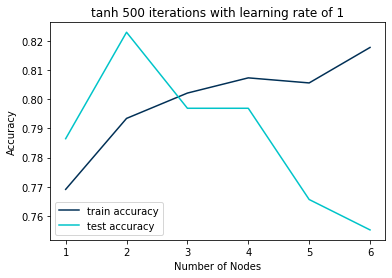

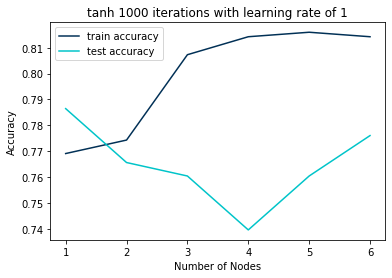

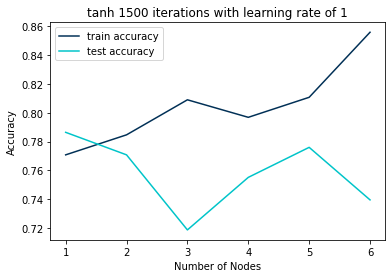

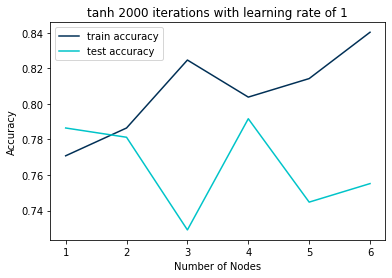

0.855903  is the max training accuracy for tanh with learning rate=1
0.831597  is the max training accuracy for tanh with learning rate=0.48
 
0.822917  is the max testing accuracy for tanh with learning rate=1
0.822917  is the max testing accuracy for tanh with learning rate=0.48


In [ ]:
#tanh - learning rate 1
tanh_train_acc,tanh_test_acc=set_up(np.tanh,tanh_der)# calls function with activation and derivative functions to set up model
tanh_train_df = pd.DataFrame(tanh_train_acc) #converts the training accuracy dictonary into a data frame
tanh_train_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)#inplace updates the actual data frame rows and not a copy

tanh_test_df = pd.DataFrame(tanh_test_acc)
tanh_test_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)

#changed the learning rate for each function in order to compare results 
#tanh - learning rate 0.48

tanh_train_diff_acc,tanh_test_diff_acc=set_up(np.tanh,tanh_der,0.48,False)
tanh_train_diff_alpha_df = pd.DataFrame(tanh_train_diff_acc) 
tanh_train_diff_alpha_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)
tanh_test_diff_alpha_df = pd.DataFrame(tanh_test_diff_acc)
tanh_test_diff_alpha_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)

#compares the max accuarcys for trainging and testing with different learning rates
tanh_training_max=tanh_train_df.max().max()
tanh_diff_train_max=tanh_train_diff_alpha_df.max().max()
print(tanh_training_max , " is the max training accuracy for tanh with learning rate=1")
print(tanh_diff_train_max , " is the max training accuracy for tanh with learning rate=0.48")
print(" ")
tanh_test_max=tanh_test_df.max().max()
tanh_diff_test_max=tanh_test_diff_alpha_df.max().max()
print(tanh_test_max , " is the max testing accuracy for tanh with learning rate=1")
print(tanh_diff_test_max , " is the max testing accuracy for tanh with learning rate=0.48")

In [ ]:
print("tanh training accuracy data frame learning rate=1")
tanh_train_df.style.apply(highlight_max)


tanh training accuracy data frame learning rate=1


,500,1000,1500,2000
1,0.769097,0.769097,0.770833,0.770833
2,0.793403,0.774306,0.784722,0.786458
3,0.802083,0.807292,0.809028,0.824653
4,0.807292,0.814236,0.796875,0.803819
5,0.805556,0.815972,0.810764,0.814236
6,0.817708,0.814236,0.855903,0.840278


In [ ]:
print("tanh testing accuracy data frame learning rate=1")
tanh_test_df.style.apply(highlight_max)

tanh testing accuracy data frame learning rate=1


,500,1000,1500,2000
1,0.786458,0.786458,0.786458,0.786458
2,0.822917,0.765625,0.770833,0.781250
3,0.796875,0.760417,0.718750,0.729167
4,0.796875,0.739583,0.755208,0.791667
5,0.765625,0.760417,0.776042,0.744792
6,0.755208,0.776042,0.739583,0.755208


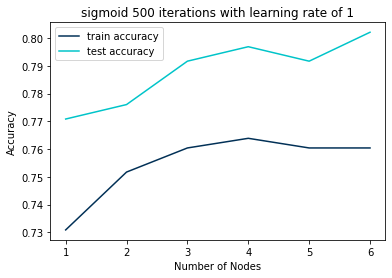

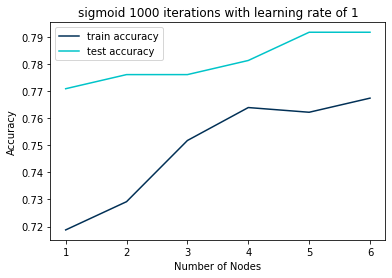

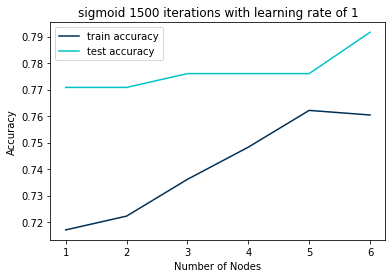

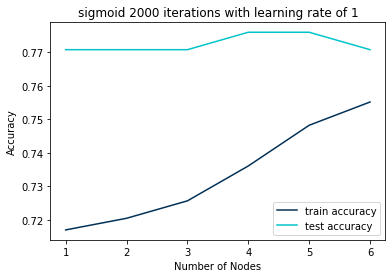

0.767361  is the max training accuracy for simoid with learning rate=1
0.765625  is the max training accuracy for sigmoid with learning rate=0.88
 
0.802083  is the max testing accuracy for sigmoid with learning rate=1
0.802083  is the max testing accuracy for sigmoid with learning rate=0.88


In [ ]:
#sigmoid learning rate 1
sig_train_acc,sig_test_acc=set_up(sigmoid,sigmoid_der)
sig_train_df = pd.DataFrame(sig_train_acc)
sig_train_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)#inplace updates the actual dataframe and not a copy
sig_test_df = pd.DataFrame(sig_test_acc)
sig_test_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)


#sigmoid - learning rate 0.88

sig_train_diff_acc,sig_test_diff_acc=set_up(sigmoid,sigmoid_der,0.88,False)
sig_train_diff_alpha_df = pd.DataFrame(sig_train_diff_acc) 
sig_train_diff_alpha_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)
sig_test_diff_alpha_df = pd.DataFrame(sig_test_diff_acc)
sig_test_diff_alpha_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)

#compares the max accuarcys for trainging and testing with different learning rates
sig_training_max=sig_train_df.max().max()
sig_diff_train_max=sig_train_diff_alpha_df.max().max()
print(sig_training_max , " is the max training accuracy for simoid with learning rate=1")
print(sig_diff_train_max , " is the max training accuracy for sigmoid with learning rate=0.88")
print(" ")
sig_test_max=sig_test_df.max().max()
sig_diff_test_max=sig_test_diff_alpha_df.max().max()
print(sig_test_max , " is the max testing accuracy for sigmoid with learning rate=1")
print(sig_diff_test_max , " is the max testing accuracy for sigmoid with learning rate=0.88")

In [ ]:
print("sigmoid training accuracy data frame learning rate=1")
sig_train_df.style.apply(highlight_max)



sigmoid training accuracy data frame learning rate=1


,500,1000,1500,2000
1,0.730903,0.718750,0.717014,0.717014
2,0.751736,0.729167,0.722222,0.720486
3,0.760417,0.751736,0.736111,0.725694
4,0.763889,0.763889,0.748264,0.736111
5,0.760417,0.762153,0.762153,0.748264
6,0.760417,0.767361,0.760417,0.755208


In [ ]:
print("sigmoid testing accuracy data frame learning rate=1")
sig_test_df.style.apply(highlight_max)

sigmoid testing accuracy data frame learning rate=1


,500,1000,1500,2000
1,0.770833,0.770833,0.770833,0.770833
2,0.776042,0.776042,0.770833,0.770833
3,0.791667,0.776042,0.776042,0.770833
4,0.796875,0.781250,0.776042,0.776042
5,0.791667,0.791667,0.776042,0.776042
6,0.802083,0.791667,0.791667,0.770833


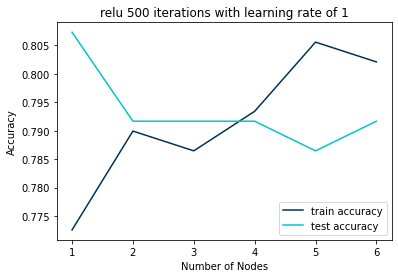

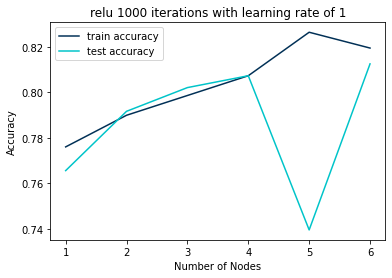

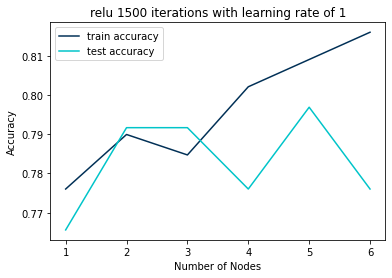

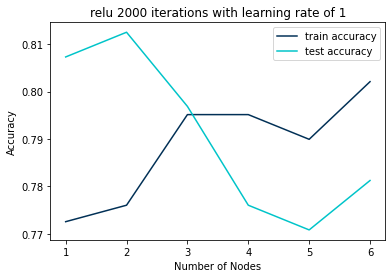

0.826389  is the max training accuracy for relu with learning rate=1
0.826389  is the max training accuracy for relu with learning rate=0.7
 
0.8125  is the max testing accuracy for relu with learning rate=1
0.817708  is the max testing accuracy for relu with learning rate=0.7


In [ ]:
#relu learning rate 1
relu_train_acc,relu_test_acc=set_up(relu,relu_der)
relu_train_df = pd.DataFrame(relu_train_acc)
relu_train_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)#inplace updates the actual dataframe and not a copy
relu_test_df = pd.DataFrame(relu_test_acc)
relu_test_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)


#relu - learning rate 0.7

relu_train_diff_acc,relu_test_diff_acc=set_up(relu,relu_der,0.7,False)
relu_train_diff_alpha_df = pd.DataFrame(relu_train_diff_acc) 
relu_train_diff_alpha_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)
relu_test_diff_alpha_df = pd.DataFrame(relu_test_diff_acc)
relu_test_diff_alpha_df.rename(index={0: 1,1:2,2:3,3:4,4:5,5:6},inplace=True)

#compares the max accuarcys for trainging and testing with different learning rates
relu_training_max=relu_train_df.max().max()
relu_diff_train_max=relu_train_diff_alpha_df.max().max()
print(relu_training_max , " is the max training accuracy for relu with learning rate=1")
print(relu_diff_train_max , " is the max training accuracy for relu with learning rate=0.7")
print(" ")
relu_test_max=relu_test_df.max().max()
relu_diff_test_max=relu_test_diff_alpha_df.max().max()
print(relu_test_max , " is the max testing accuracy for relu with learning rate=1")
print(relu_diff_test_max , " is the max testing accuracy for relu with learning rate=0.7")

In [ ]:
print("relu training accuracy data frame learning rate=1")
relu_train_df.style.apply(highlight_max)


relu training accuracy data frame learning rate=1


,500,1000,1500,2000
1,0.772569,0.776042,0.776042,0.772569
2,0.789931,0.789931,0.789931,0.776042
3,0.786458,0.798611,0.784722,0.795139
4,0.793403,0.807292,0.802083,0.795139
5,0.805556,0.826389,0.809028,0.789931
6,0.802083,0.819444,0.815972,0.802083


In [ ]:
print("relu testing accuracy data frame learning rate=1")
relu_test_df.style.apply(highlight_max)

relu testing accuracy data frame learning rate=1


,500,1000,1500,2000
1,0.807292,0.765625,0.765625,0.807292
2,0.791667,0.791667,0.791667,0.812500
3,0.791667,0.802083,0.791667,0.796875
4,0.791667,0.807292,0.776042,0.776042
5,0.786458,0.739583,0.796875,0.770833
6,0.791667,0.812500,0.776042,0.781250


Code with two hidden layers:
https://colab.research.google.com/drive/15fLUm3khftA-w51r3aDkY8A-rGE8idk-?usp=sharing